<a href="https://colab.research.google.com/github/datlt189/FinalProjectAI/blob/main/trainModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
from sklearn.model_selection import train_test_split

In [71]:
folder = '/content/drive/MyDrive/FinalProjectAI/dataset/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('moto'):
    output= 1.0
  if file.startswith('car'):
    output= 2.0
  photo = load_img(folder + file, target_size= (100,100))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [72]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/FinalProjectAI/data_train/vehicle_photos.npy', photos)
save('/content/drive/MyDrive/FinalProjectAI/data_train/vehicle_labels.npy', labels)

(500, 100, 100, 3) (500,)


In [73]:
# Split data into train & test
train_x, test_x, train_y, test_y = train_test_split(photos, labels, test_size=0.2, random_state=20)

In [74]:
print(test_x.shape, train_x.shape)

(100, 100, 100, 3) (400, 100, 100, 3)


In [75]:
train_x = train_x.reshape((400, 100, 100, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((100, 100, 100, 3))
test_x = test_x.astype('float32')/255

In [76]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,3)
test_y = to_categorical(test_y,3)

In [77]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 8
classes = 3

In [78]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 1024, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [79]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 12, 12, 128)     

In [80]:
#Compile:
model.compile(optimizer = 'adam', loss= "binary_crossentropy", metrics=["acc"])

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.3,
    zoom_range=0.3,
    channel_shift_range=0.0,
    fill_mode='nearest')
datagen.fit(train_x)

In [90]:
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/8
7/7 [==============================] - 3s 47ms/step - loss: 0.0762 - acc: 0.9500
Epoch 2/8
7/7 [==============================] - 0s 32ms/step - loss: 0.0510 - acc: 0.9725
Epoch 3/8
7/7 [==============================] - 0s 32ms/step - loss: 0.0485 - acc: 0.9750
Epoch 4/8
7/7 [==============================] - 0s 32ms/step - loss: 0.0646 - acc: 0.9625
Epoch 5/8
7/7 [==============================] - 0s 31ms/step - loss: 0.0363 - acc: 0.9825
Epoch 6/8
7/7 [==============================] - 0s 34ms/step - loss: 0.0349 - acc: 0.9825
Epoch 7/8
7/7 [==============================] - 0s 34ms/step - loss: 0.0385 - acc: 0.9775
Epoch 8/8
7/7 [==============================] - 0s 34ms/step - loss: 0.0414 - acc: 0.9725


In [91]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

4/4 [==============================] - 0s 10ms/step - loss: 0.0495 - acc: 0.9600
Test accuracy: 0.9599999785423279


In [92]:
model.save('/content/drive/MyDrive/FinalProjectAI/model_trained/vehicle_counting_and_classification.h5')

1/1 [==============================] - 0s 131ms/step
Vehicle type: Motorbike


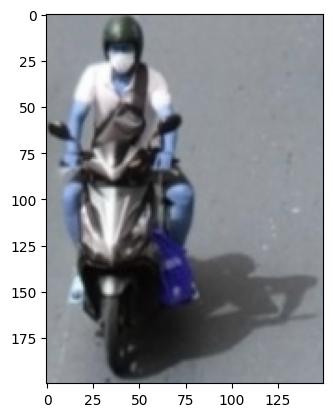

1/1 [==============================] - 0s 26ms/step
Vehicle type: Car


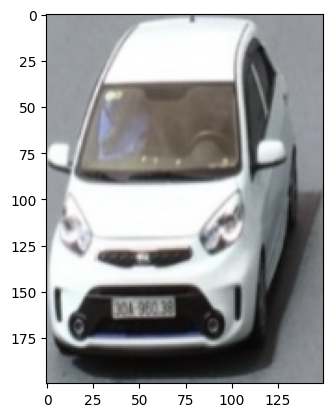

1/1 [==============================] - 0s 35ms/step
Vehicle type: Motorbike


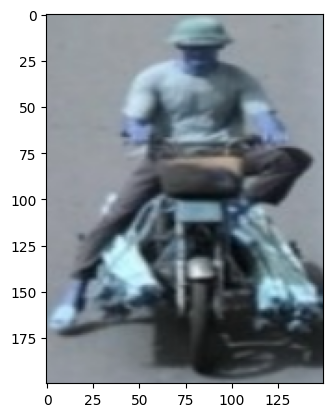

1/1 [==============================] - 0s 27ms/step
Vehicle type: Motorbike


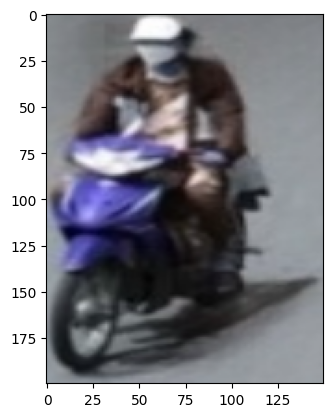

1/1 [==============================] - 0s 20ms/step
Vehicle type: Car


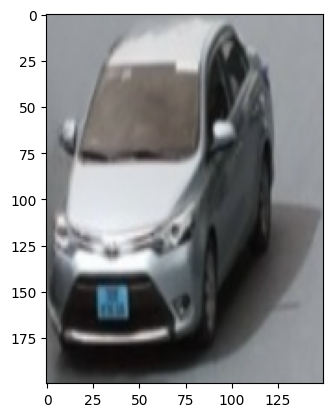

1/1 [==============================] - 0s 21ms/step
Vehicle type: Car


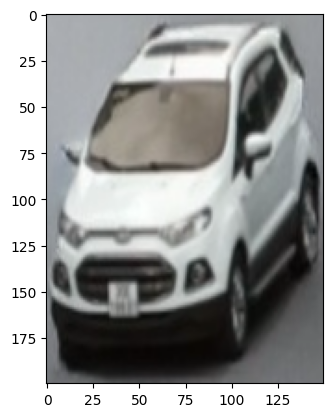

1/1 [==============================] - 0s 18ms/step
Vehicle type: Car


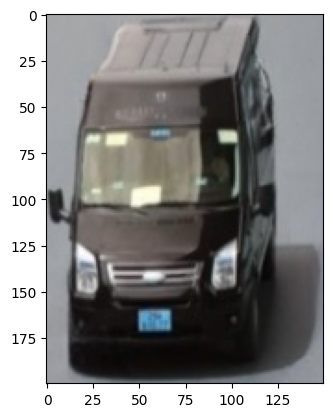

Number of vehicles:  7


In [94]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from PIL import Image
from keras.models import load_model
import cv2
import numpy as np
# Load pre-trained CNN model
model = load_model('/content/drive/MyDrive/modelforFinal/vehicle2.h5')

# Read image and perform vehicle detection
img = cv2.imread('/content/drive/MyDrive/testvehicles/testforFinal1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 30, 130)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dilated = cv2.dilate(edges, kernel, iterations=1)
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Divide image into subimages based on detected contours
subimages = []
for contour in contours:
    if cv2.contourArea(contour) > 3000:
        x,y,w,h = cv2.boundingRect(contour)
        x2, y2 = x + w, y + h
        subimg = img[y:y+h, x:x+w]
        subimages.append(subimg)

# Classify subimages using pre-trained CNN model

for subimg in subimages:
    resized = cv2.resize(subimg, (100, 100))
    show = cv2.resize(subimg, (150,200))
    resized = np.expand_dims(resized, axis=0)
    resized = resized.astype('float32') / 255
    pred = (model.predict(resized).argmax())
    class_name=['','Motorbike','Car']
    if(class_name[pred] == 'Motorbike'):
        vehicle_type = 'Motorbike'
        print('Vehicle type:', vehicle_type)
        plt.imshow(show)
        plt.show()
    elif(class_name[pred] == 'Car'):
        vehicle_type = 'Car'
        print('Vehicle type:', vehicle_type)
        plt.imshow(show)
        plt.show()
    else: 
        pass
# Print result
# if (car_count > motorbike_count):
#   print('Car count:', car_count)
# else:
#   print('Motorbike count:', motorbike_count)

print('Number of vehicles: ', len(subimages))